In [1]:
from alo_module import SimpleALO

아래는 ALO 기본 설정 및 라이브러리 설치 코드입니다. 설치 에러가 발생하면 아래 셀을 재실행 하고, 지속적으로 문제가 있을 시 문의바랍니다

## Train workflow 

In [2]:
# 아래는 Train 시 필요한 라이브러리를 설치하는 코드입니다. library 설치 에러가 발생하면 아래 셀을 재실행 해주세요
simalo = SimpleALO(0)

[2023-11-08 04:20:50,000][PROCESS][INFO]: You did not write any << s3_private_key_file >> in the config yaml file. When you wanna get data from s3 storage, 
                                 you have to write the s3_private_key_file path or set << ACCESS_KEY, SECRET_KEY >> in your os environment. 

[2023-11-08 04:20:50,002][PROCESS][INFO]:  Skip loading external data. << /nas001/users/yoonji.suh/tcr_test_20231016/train_multiclass/ >> 
 << train_multiclass >> already exists in << /home/jovyan/project/alo_dev/tcr/alo/input/ >>. 
 & << get_external_data >> is set as << once >>. 

[2023-11-08 04:20:50,004][PROCESS][INFO]: Start setting-up << input >> asset @ << assets >> directory.
[2023-11-08 04:20:50,007][PROCESS][INFO]: << input >> asset had already been created at 2023-11-08 01:28:00.751822
[2023-11-08 04:20:50,008][PROCESS][INFO]: Start setting-up << preprocess >> asset @ << assets >> directory.
[2023-11-08 04:20:50,010][PROCESS][INFO]: << preprocess >> asset had already been created a

### 1. Input asset 
##### Input asset의 arguments 수정 및 확인
- 필요한경우 input_args의 항목을 ***input_args[argument명]=value입력*** 을 통해 변경할 수 있습니다.  

In [3]:
# TCR train asset 순서에 따라 step 순서를 입력합니다. (input(0) - preprocess(1) - sampling(2) - train(3))
input_args = simalo.get_args(step=0)

# 아래 주석을 풀어 input_args를 원하는 값으로 수정합니다. 
# input_args['x_columns'] = ['input_x0','input_x1']
input_args

{'input_path': 'train_multiclass',
 'x_columns': ['input_x0', 'input_x1', 'input_x2', 'input_x3'],
 'use_all_x': False,
 'y_column': 'target',
 'groupkey_columns': None,
 'drop_columns': None,
 'time_column': None,
 'concat_dataframes': True,
 'encoding': None}

##### Input asset 실행 

In [4]:
simalo.run(args=input_args) # 변경한 input_args 반영

# simalo.data: input asset의 결과물입니다. 다음 asset 실행 시 필요합니다. 
# simalo.config: input asset의 결과 config입니다. 다음 asset실행 시 필요합니다.

# input asset의 결과 dataframe은 data_input['dataframe']으로 확인할 수 있습니다. 
simalo.data['dataframe'].head(10) 

[2023-11-08 04:21:02,437][USER][INFO][train_pipeline][input]: >> Load path : ['/home/jovyan/project/alo_dev/tcr/alo//input/train_multiclass/']
[2023-11-08 04:21:02,453][USER][INFO][train_pipeline][input]: >> The file for batch data has been loaded. (File name: /home/jovyan/project/alo_dev/tcr/alo//input/train_multiclass/iris.csv)
[2023-11-08 04:21:02,457][USER][INFO][train_pipeline][input]: ==================== Success loading dataframe ====================
[2023-11-08 04:21:02,461][USER][INFO][train_pipeline][input]: >> Drop columns from the input dataframe when set << auto >> mode or specified in the << drop_columns >> in config yaml. (dropped colums:[])
[2023-11-08 04:21:02,465][USER][INFO][train_pipeline][input]: >> Start processing ignore columns & drop columns: ['/home/jovyan/project/alo_dev/tcr/alo//input/train_multiclass/iris.csv']


[2023-11-08 04:21:02,433][ASSET][INFO][train_pipeline][input]: 

============================= ASSET START =============================
- time (UTC)        : 2023-11-08 04:21:02
- current step      : input
- asset branch.     : tabular_2.0
- alolib ver.       : 2.0
- alo ver.          : release-2.0
- load envs. keys   : dict_keys(['project_home', 'pipeline', 'step', 'num_step', 'artifacts', 'alo_version', 'asset_branch', 'interface_mode', 'load_data', 'load_config', 'save_data', 'save_config', 'log_file_path'])
- load args. keys   : dict_keys(['input_path', 'x_columns', 'use_all_x', 'y_column', 'groupkey_columns', 'drop_columns', 'time_column', 'concat_dataframes', 'encoding'])
- load config. keys : dict_keys(['meta'])
- load data keys    : dict_keys([])


Saved : /home/jovyan/project/alo_dev/tcr/alo//.asset_interface/train_pipeline/input_data.pkl
Saved : /home/jovyan/project/alo_dev/tcr/alo//.asset_interface/train_pipeline/input_config.pkl
[2023-11-08 04:21:02,471][ASSET][INFO][train

,Unnamed: 0,input_x0,input_x1,input_x2,input_x3,target
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa
5,5,5.4,3.9,1.7,0.4,setosa
6,6,4.6,3.4,1.4,0.3,setosa
7,7,5.0,3.4,1.5,0.2,setosa
8,8,4.4,2.9,1.4,0.2,setosa
9,9,4.9,3.1,1.5,0.1,setosa


</br>

### 2. Preprocess asset 
##### Preprocess asset의 args수정 및 확인
- 필요한경우 preprocess_args의 항목을 ***preprocess_args[argument명]=value입력*** 을 통해 변경할 수 있습니다.  

In [5]:
# TCR train asset 순서에 따라 step 순서를 입력합니다. (input(0) - preprocess(1) - sampling(2) - train(3))
preprocess_args = simalo.get_args(step=1)

# 아래 주석을 풀어 preprocess_args 수정합니다. 
# preprocess_args['handling_missing'] = 'interpolation'
preprocess_args

{'handling_encoding_y_column': 'target',
 'handling_encoding_y': 'label',
 'handling_missing': 'dropna',
 'handling_scaling_x': 'none',
 'drop_duplicate_time': True,
 'load_train_preprocess': False}

##### Preprocess asset 실행 

In [6]:
simalo.run(args=preprocess_args) # 변경한 preprocess_args 반영
# asset_structure.data: preprocess asset의 결과물입니다. 다음 asset 실행 시 필요합니다. 
# asset_structure.config: preprocess asset의 결과 config입니다. 다음 asset실행 시 필요합니다. 

# preprocess asset의 결과 dataframe은 data_preprocess['dataframe']으로 확인할 수 있습니다. 
simalo.data['dataframe'].head(10) 

Loaded : /home/jovyan/project/alo_dev/tcr/alo//.asset_interface/train_pipeline/input_config.pkl
Loaded : /home/jovyan/project/alo_dev/tcr/alo//.asset_interface/train_pipeline/input_data.pkl
[2023-11-08 04:21:04,477][ASSET][INFO][train_pipeline][preprocess]: Successfully got model path for saving or loading your AI model: 
 /home/jovyan/project/alo_dev/tcr/alo//.train_artifacts/models/preprocess/
[2023-11-08 04:21:04,478][ASSET][INFO][train_pipeline][preprocess]: 

============================= ASSET START =============================
- time (UTC)        : 2023-11-08 04:21:04
- current step      : preprocess
- asset branch.     : release-1.2
- alolib ver.       : 2.0
- alo ver.          : release-2.0
- load envs. keys   : dict_keys(['project_home', 'pipeline', 'step', 'num_step', 'artifacts', 'alo_version', 'asset_branch', 'interface_mode', 'load_data', 'load_config', 'save_data', 'save_config', 'log_file_path', 'prev_step'])
- load args. keys   : dict_keys(['handling_encoding_y_column

,input_x0,input_x1,input_x2,input_x3,target,target_encoded,input_x0_nan,input_x1_nan,input_x2_nan,input_x3_nan,target_encoded_nan
0,5.1,3.5,1.4,0.2,setosa,0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,setosa,0,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,setosa,0,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,setosa,0,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,setosa,0,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,setosa,0,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,setosa,0,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,setosa,0,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,setosa,0,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,setosa,0,4.9,3.1,1.5,0.1,0


</br>

### 3. Sampling asset 
##### Sampling asset의 args수정 및 확인
- 필요한경우 Sampling_args의 항목을 ***sampling_args[argument명]=value입력*** 을 통해 변경할 수 있습니다.  

In [7]:
# TCR train asset 순서에 따라 step 순서를 입력합니다. (input(0) - preprocess(1) - sampling(2) - train(3))
sampling_args = simalo.get_args(step=2)

# 아래 주석을 풀어 preprocess_args 수정합니다. 
# sampling_args['sampling_type'] = 'under'
sampling_args

{'sampling_type': 'none',
 'sampling_method': 'random',
 'label_sampling': False,
 'ignore_label_class': None,
 'negative_target_class': None,
 'label_sampling_num_type': None,
 'label_sampling_num': None,
 'sampling_groupkey_columns': None,
 'sampling_num_type': 'ratio',
 'sampling_num': 0.8}

##### Sampling asset 실행 

In [8]:
simalo.run(args=sampling_args) # 변경한 sampling_args 반영
# asset_structure.data: sampling asset의 결과물입니다. 다음 asset 실행 시 필요합니다. 
# asset_structure.config: sampling asset의 결과 config입니다. 다음 asset실행 시 필요합니다. 

# sampling asset의 결과 dataframe은 data_sampling['dataframe']으로 확인할 수 있습니다. 
simalo.data['dataframe'].head(10) 

/home/jovyan/conda/envs/tcr/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loaded : /home/jovyan/project/alo_dev/tcr/alo//.asset_interface/train_pipeline/preprocess_config.pkl
Loaded : /home/jovyan/project/alo_dev/tcr/alo//.asset_interface/train_pipeline/preprocess_data.pkl
[2023-11-08 04:21:15,450][ASSET][INFO][train_pipeline][sampling]: 

============================= ASSET START =============================
- time (UTC)        : 2023-11-08 04:21:15
- current step      : sampling
- asset branch.     : release-1.2
- alolib ver.       : 2.0
- alo ver.          : release-2.0
- load envs. keys   : dict_keys(['project_home', 'pipeline', 'step', 'num_step', 'artifacts', 'alo_version', 'asset_branch', 'interface_mode', 'load_data', 'load_config', 'save_data', 'save_config', 'log_file_path', 'prev_step'])
- load args. keys   : dict_keys(['sampling_type', 'sampling_method', 'label_sampling', 'ignore_label_class', 'negative_target_class', 'label_sampling_num_type', 'label_sampling_num', 'sampling_groupkey_columns', 'sampling_num_type', 'sampling_num'])
- load config

,input_x0,input_x1,input_x2,input_x3,target,target_encoded,input_x0_nan,input_x1_nan,input_x2_nan,input_x3_nan,target_encoded_nan
0,5.1,3.5,1.4,0.2,setosa,0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,setosa,0,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,setosa,0,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,setosa,0,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,setosa,0,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,setosa,0,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,setosa,0,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,setosa,0,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,setosa,0,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,setosa,0,4.9,3.1,1.5,0.1,0


</br>

### 4. train asset 
##### train asset의 args수정 및 확인
- 필요한경우 TCR_args의 항목을 ***TCR_args[argument명]=value입력*** 을 통해 변경할 수 있습니다.  

In [9]:
# TCR train asset 순서에 따라 step 순서를 입력합니다. (input(0) - preprocess(1) - sampling(2) - train(3))
tcr_args = simalo.get_args(step=3)

# 아래 주석을 풀어 tcr_args를 수정합니다. 
# tcr_args['model_list'] = ['lgb']
tcr_args

{'model_type': 'classification',
 'data_split_method': 'cross_validate',
 'evaluation_metric': 'accuracy',
 'model_list': ['lgb', 'rf', 'cb'],
 'num_hpo': 3,
 'param_range': {'rf': {'max_depth': 6, 'n_estimators': [300, 500]},
  'gbm': {'max_depth': [5, 7], 'n_estimators': [300, 500]},
  'ngb': {'col_sample': [0.6, 0.8], 'n_estimators': [100, 300]},
  'lgb': {'max_depth': [5, 9], 'n_estimators': [300, 500]},
  'cb': {'max_depth': [5, 9], 'n_estimators': [100, 500]}},
 'shap_ratio': 1.0}

##### train asset 실행 

Loaded : /home/jovyan/project/alo_dev/tcr/alo//.asset_interface/train_pipeline/sampling_config.pkl
Loaded : /home/jovyan/project/alo_dev/tcr/alo//.asset_interface/train_pipeline/sampling_data.pkl
[2023-11-08 04:21:20,287][ASSET][INFO][train_pipeline][train]: Successfully got model path for saving or loading your AI model: 
 /home/jovyan/project/alo_dev/tcr/alo//.train_artifacts/models/train/
[2023-11-08 04:21:20,292][ASSET][INFO][train_pipeline][train]: Successfully got << output path >> for saving your data into csv or jpg file: 
 /home/jovyan/project/alo_dev/tcr/alo//.train_artifacts/output/train/ 
 - [NOTE] The names of output file must be fixed as << output.csv, output.jpg >> 
[2023-11-08 04:21:20,293][ASSET][INFO][train_pipeline][train]: 

============================= ASSET START =============================
- time (UTC)        : 2023-11-08 04:21:20
- current step      : train
- asset branch.     : main
- alolib ver.       : 2.0
- alo ver.          : release-2.0
- load envs. key


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[INFO] 0th-fold RandomForestClassifier_set0 모델을 학습합니다.(1/36)
[INFO] 1th-fold RandomForestClassifier_set0 모델을 학습합니다.(2/36)
[INFO] 2th-fold RandomForestClassifier_set0 모델을 학습합니다.(3/36)
[INFO] 3th-fold RandomForestClassifier_set0 모델을 학습합니다.(4/36)
[INFO] 0th-fold RandomForestClassifier_set1 모델을 학습합니다.(5/36)
[INFO] 1th-fold RandomForestClassifier_set1 모델을 학습합니다.(6/36)
[INFO] 2th-fold RandomForestClassifier_set1 모델을 학습합니다.(7/36)
[INFO] 3th-fold RandomForestClassifier_set1 모델을 학습합니다.(8/36)
[INFO] 0th-fold RandomForestClassifier_set2 모델을 학습합니다.(9/36)
[INFO] 1th-fold RandomForestClassifier_set2 모델을 학습합니다.(10/36)
[INFO] 2th-fold RandomForestClassifier_set2 모델을 학습합니다.(11/36)
[INFO] 3th-fold RandomForestClassifier_set2 모델을 학습합니다.(12/36)
[INFO] 0th-fold LGBMClassifier_set0 모델을 학습합니다.(13/36)
[INFO] 1th-fold LGBMClassifier_set0 모델을 학습합니다.(14/36)
[INFO] 2th-fold LGBMClassifier_set0 모델을 학습합니다.(15/36)
[INFO] 3th-fold LGBMClassifier_set0 모델을 학습합니다.(16/36)
[INFO] 0th-fold LGBMClassifier_set1 모델을 학습합니다.(17

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[INFO] 평가 지표는 ( accuracy ) 를 사용합니다. 
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


train_pipeline [['x0', 'input_x0_nan'], ['x1', 'input_x1_nan'], ['x2', 'input_x2_nan'], ['x3', 'input_x3_nan']]


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
모델 정보 로그를 저장합니다. (저장위치: /home/jovyan/project/alo_dev/tcr/alo//.train_artifacts/models/train/model_selection.json)

Top 1 model file is saved: /home/jovyan/project/alo_dev/tcr/alo//.train_artifacts/models/train/best_model_top0.pkl
[Score] accuracy: 0.9660
[Hyper-parameters] max_depth: 5, n_estimators: 100, verbose: 0, random_state: 1234, thread_count: 6, allow_writing_files: False, 

Top 2 model file is saved: /home/jovyan/project/alo_dev/tcr/alo//.train_artifacts/models/train/best_model_top1.pkl
[Score] accuracy: 0.959

,input_x0_nan,input_x1_nan,input_x2_nan,input_x3_nan,input_x0_nan_shapley,input_x1_nan_shapley,input_x2_nan_shapley,input_x3_nan_shapley,target_encoded_nan,pred_target_encoded_nan,pred_target_encoded_nan_best0,pred_target_encoded_nan_best1,pred_target_encoded_nan_best2,prob_0,prob_1,prob_2
0,5.7,2.8,4.1,1.3,-0.120640,-0.565583,-0.292216,-0.708609,1,1,1,1,1,0.001300,0.997956,0.000744
1,5.0,2.3,3.3,1.0,0.612707,-1.634705,0.184778,-0.882783,1,1,1,1,1,0.004045,0.994512,0.001443
2,6.5,2.8,4.6,1.5,-0.889092,-0.445722,-0.425943,-0.971802,1,1,1,1,1,0.000938,0.997803,0.001259
3,6.3,2.9,5.6,1.8,-0.633480,-0.240888,-1.250112,-0.993943,2,2,2,2,2,0.000972,0.001713,0.997316
4,5.1,2.5,3.0,1.1,0.595638,-1.436253,0.367625,-0.872879,1,1,1,1,1,0.006667,0.990348,0.002985
5,6.6,3.0,4.4,1.4,-0.960572,-0.319784,-0.278283,-0.895378,1,1,1,1,1,0.001309,0.997874,0.000817
6,5.5,2.5,4.0,1.3,-0.190894,-1.338538,-0.419388,-0.721726,1,1,1,1,1,0.000867,0.997849,0.001284
7,5.5,2.3,4.0,1.3,-0.191156,-1.224103,-0.279464,-0.715320,1,1,1,1,1,0.001036,0.997480,0.001484
8,5.1,3.8,1.9,0.4,0.790117,0.971815,1.143319,1.353714,0,0,0,0,0,0.984845,0.013084,0.002072
9,5.2,2.7,3.9,1.4,0.471003,-0.833077,-0.322991,-1.216012,1,1,1,1,1,0.004865,0.992834,0.002301


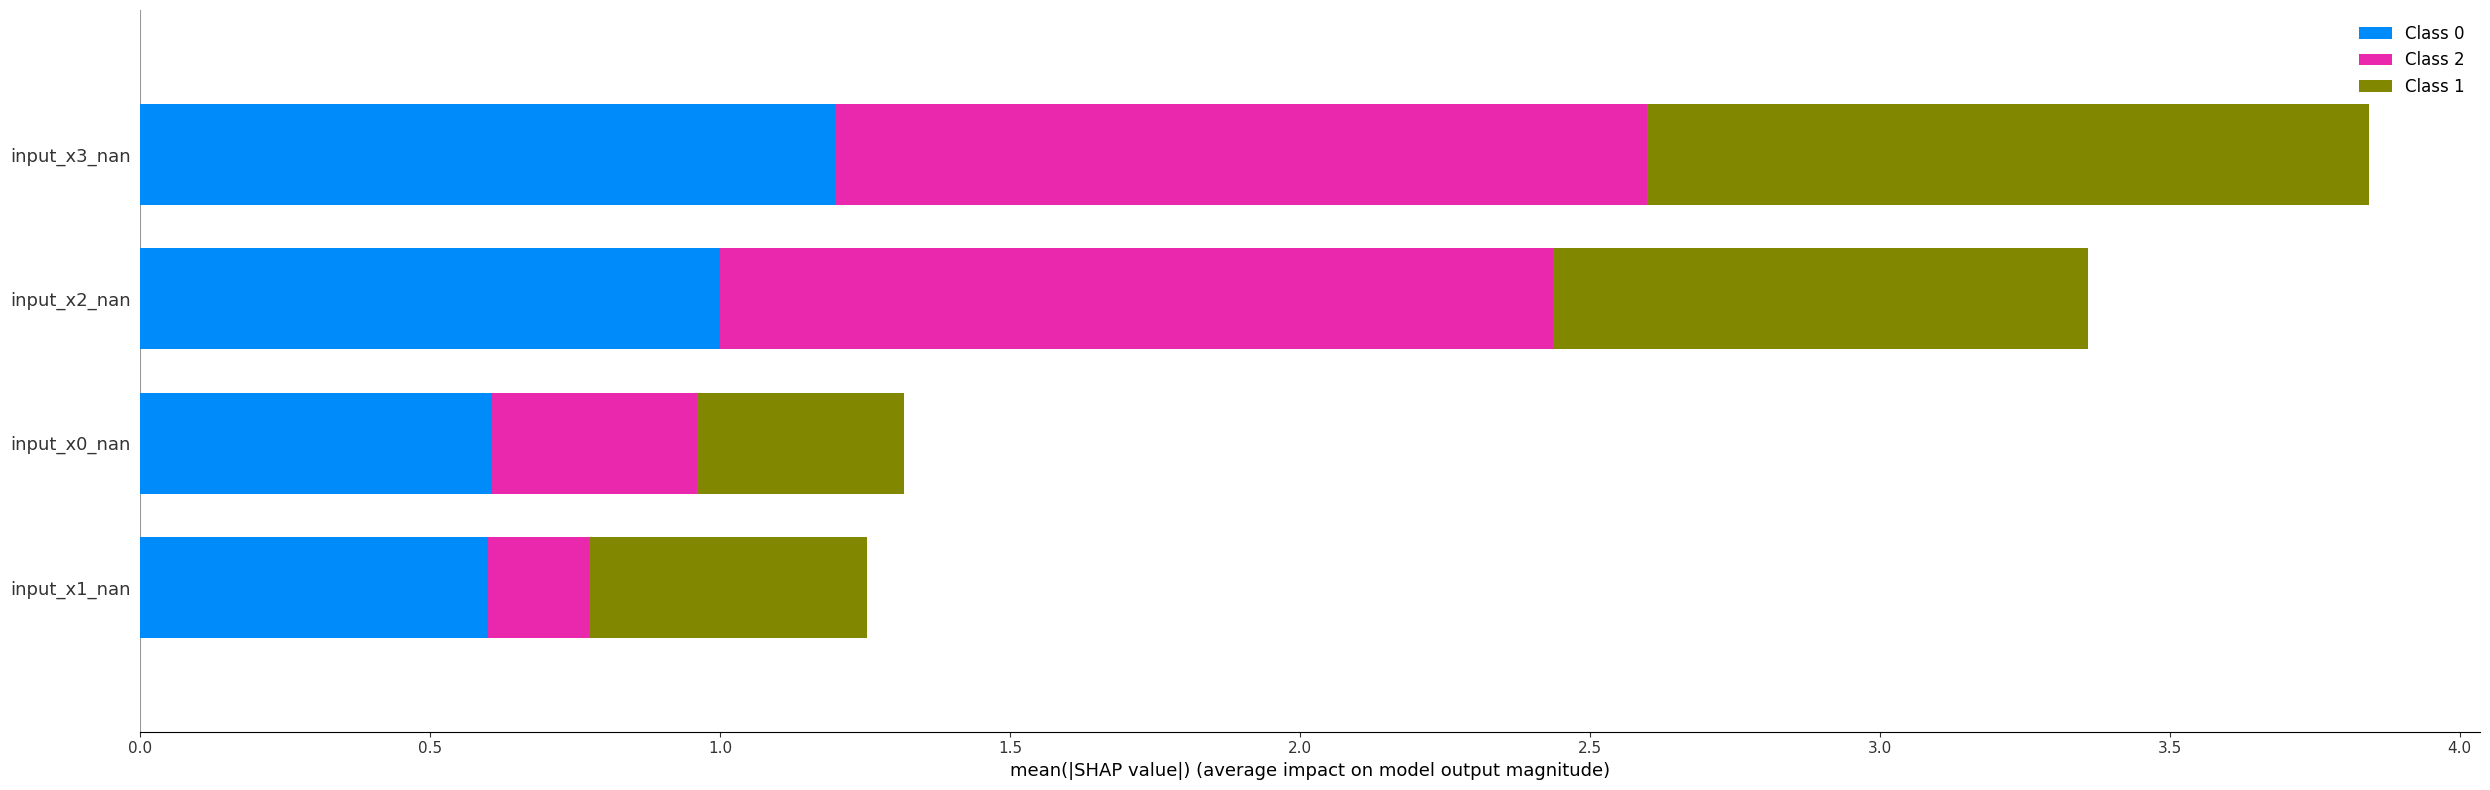

In [10]:
simalo.run(args=tcr_args) # 변경한 tcr_args 반영
# simalo.data: TCR asset의 결과물입니다. 
# simalo.config: TCR asset의 결과 config입니다. 

# tcr asset의 결과 dataframe은 data_tcr['dataframe']으로 확인할 수 있습니다. 
simalo.data['dataframe'].head(10) 

<br>

## Inference workflow 

In [11]:
# 아래는 Inference 시 필요한 라이브러리를 설치하는 코드입니다. library 설치 에러가 발생하면 아래 셀을 재실행 해주세요
simalo = SimpleALO(1)

[2023-11-08 04:21:25,304][PROCESS][INFO]: You did not write any << s3_private_key_file >> in the config yaml file. When you wanna get data from s3 storage, 
                                 you have to write the s3_private_key_file path or set << ACCESS_KEY, SECRET_KEY >> in your os environment. 

[2023-11-08 04:21:25,314][PROCESS][INFO]:  Skip loading external data. << /nas001/users/yoonji.suh/tcr_test_20231016/inf/ >> 
 << inf >> already exists in << /home/jovyan/project/alo_dev/tcr/alo/input/ >>. 
 & << get_external_data >> is set as << once >>. 

[2023-11-08 04:21:25,320][PROCESS][INFO]: Start setting-up << input >> asset @ << assets >> directory.
[2023-11-08 04:21:25,323][PROCESS][INFO]: << input >> asset had already been created at 2023-11-08 01:28:00.751822
[2023-11-08 04:21:25,325][PROCESS][INFO]: Start setting-up << preprocess >> asset @ << assets >> directory.
[2023-11-08 04:21:25,327][PROCESS][INFO]: Now << local >> asset_source_code mode: <preprocess> asset exists.
[2023-11

### 1. Input asset 
##### Input asset의 arguments 수정 및 확인
- 필요한경우 input_args의 항목을 ***input_args[argument명]=value입력*** 을 통해 변경할 수 있습니다.  

In [12]:
# TCR inference asset 순서에 따라 step 순서를 입력합니다. (input(0) - preprocess(1) - inference(2))
input_args =  simalo.get_args(step=0)

# 아래 주석을 풀어 input_args를 원하는 값으로 수정합니다. 
# input_args['x_columns'] = ['']
input_args

{'input_path': 'inf',
 'x_columns': ['input_x0', 'input_x1', 'input_x2', 'input_x3'],
 'use_all_x': False,
 'y_column': None,
 'groupkey_columns': None,
 'drop_columns': None,
 'time_column': None,
 'concat_dataframes': True,
 'encoding': None}

##### Input asset 실행 

In [13]:
simalo.run(args=input_args) # 변경한 input_args 반영
# simalo.data: input asset의 결과물입니다. 다음 asset 실행 시 필요합니다. 
# simalo.config: input asset의 결과 config입니다. 다음 asset실행 시 필요합니다.

# input asset의 결과 dataframe은 data_input['dataframe']으로 확인할 수 있습니다. 
simalo.data['dataframe'].head(10) 

[2023-11-08 04:21:25,374][USER][INFO][inference_pipeline][input]: >> Load path : ['/home/jovyan/project/alo_dev/tcr/alo//input/inf/']
[2023-11-08 04:21:25,388][USER][INFO][inference_pipeline][input]: >> The file for batch data has been loaded. (File name: /home/jovyan/project/alo_dev/tcr/alo//input/inf/iris.csv)
[2023-11-08 04:21:25,392][USER][INFO][inference_pipeline][input]: ==================== Success loading dataframe ====================
[2023-11-08 04:21:25,395][USER][INFO][inference_pipeline][input]: >> Drop columns from the input dataframe when set << auto >> mode or specified in the << drop_columns >> in config yaml. (dropped colums:[])
[2023-11-08 04:21:25,398][USER][INFO][inference_pipeline][input]: >> Start processing ignore columns & drop columns: ['/home/jovyan/project/alo_dev/tcr/alo//input/inf/iris.csv']


[2023-11-08 04:21:25,370][ASSET][INFO][inference_pipeline][input]: 

============================= ASSET START =============================
- time (UTC)        : 2023-11-08 04:21:25
- current step      : input
- asset branch.     : tabular_dev
- alolib ver.       : 2.0
- alo ver.          : release-2.0
- load envs. keys   : dict_keys(['project_home', 'pipeline', 'step', 'num_step', 'artifacts', 'alo_version', 'asset_branch', 'interface_mode', 'load_data', 'load_config', 'save_data', 'save_config', 'log_file_path'])
- load args. keys   : dict_keys(['input_path', 'x_columns', 'use_all_x', 'y_column', 'groupkey_columns', 'drop_columns', 'time_column', 'concat_dataframes', 'encoding'])
- load config. keys : dict_keys(['meta'])
- load data keys    : dict_keys([])


Saved : /home/jovyan/project/alo_dev/tcr/alo//.asset_interface/inference_pipeline/input_data.pkl
Saved : /home/jovyan/project/alo_dev/tcr/alo//.asset_interface/inference_pipeline/input_config.pkl
[2023-11-08 04:21:25,406][ASSET]

,Unnamed: 0,input_x0,input_x1,input_x2,input_x3,target
0,147,6.5,3.0,5.2,2.0,virginica
1,148,6.2,3.4,5.4,2.3,virginica
2,149,5.9,3.0,5.1,1.8,virginica


</br>

### 2. Preprocess asset 
##### Preprocess asset의 args수정 및 확인
- 필요한경우 preprocess_args의 항목을 ***preprocess_args[argument명]=value입력*** 을 통해 변경할 수 있습니다.  

In [14]:
# TCR inference  asset 순서에 따라 step 순서를 입력합니다. (input(0) - preprocess(1) - inference(2))
preprocess_args = simalo.get_args(step=1)

# 아래 주석을 풀어 preprocess_args 수정합니다. 
# preprocess_args['handling_missing'] = 'interpolation'
preprocess_args

{'handling_encoding_y_column': None,
 'handling_encoding_y': None,
 'handling_missing': 'dropna',
 'handling_scaling_x': 'none',
 'drop_duplicate_time': True,
 'load_train_preprocess': True}

##### Preprocess asset 실행 

In [15]:
simalo.run(args=preprocess_args) # 변경한 preprocess_args 반영
# simalo.data: preprocess asset의 결과물입니다. 다음 asset 실행 시 필요합니다. 
# simalo.config: preprocess asset의 결과 config입니다. 다음 asset실행 시 필요합니다. 

# preprocess asset의 결과 dataframe은 simalo.data['dataframe']으로 확인할 수 있습니다. 
simalo.data['dataframe'].head(10) 

Loaded : /home/jovyan/project/alo_dev/tcr/alo//.asset_interface/inference_pipeline/input_config.pkl
Loaded : /home/jovyan/project/alo_dev/tcr/alo//.asset_interface/inference_pipeline/input_data.pkl
[2023-11-08 04:21:25,449][ASSET][INFO][inference_pipeline][preprocess]: Successfully got model path for saving or loading your AI model: 
 /home/jovyan/project/alo_dev/tcr/alo//.train_artifacts/models/preprocess/
[2023-11-08 04:21:25,450][ASSET][INFO][inference_pipeline][preprocess]: 

============================= ASSET START =============================
- time (UTC)        : 2023-11-08 04:21:25
- current step      : preprocess
- asset branch.     : tcr
- alolib ver.       : 2.0
- alo ver.          : release-2.0
- load envs. keys   : dict_keys(['project_home', 'pipeline', 'step', 'num_step', 'artifacts', 'alo_version', 'asset_branch', 'interface_mode', 'load_data', 'load_config', 'save_data', 'save_config', 'log_file_path', 'prev_step'])
- load args. keys   : dict_keys(['handling_encoding_

,input_x0,input_x1,input_x2,input_x3,input_x0_nan,input_x1_nan,input_x2_nan,input_x3_nan
0,6.5,3.0,5.2,2.0,6.5,3.0,5.2,2.0
1,6.2,3.4,5.4,2.3,6.2,3.4,5.4,2.3
2,5.9,3.0,5.1,1.8,5.9,3.0,5.1,1.8


<br>

### 3. inference asset 
##### inference asset의 args수정 및 확인
- 필요한경우 TCR_args의 항목을 ***TCR_args[argument명]=value입력*** 을 통해 변경할 수 있습니다.  

In [16]:
# TCR inference asset 순서에 따라 step 순서를 입력합니다. (input(0) - preprocess(1) - inference(2))
tcr_args = simalo.get_args(step=2)

# 아래 주석을 풀어 tcr_args를 수정합니다. 
# tcr_args['model_type'] = 
tcr_args

{'model_type': 'classification', 'run_shapley': True}

##### inference asset 실행 

In [17]:
simalo.run(args=tcr_args) # 변경한 preprocess_args 반영
# simalo.data: TCR asset의 결과물입니다. 
# simalo.config: TCR asset의 결과 config입니다. 

# tcr asset의 결과 dataframe은 data_tcr['dataframe']으로 확인할 수 있습니다. 
simalo.data['dataframe'].head(10) 

Loaded : /home/jovyan/project/alo_dev/tcr/alo//.asset_interface/inference_pipeline/preprocess_config.pkl
Loaded : /home/jovyan/project/alo_dev/tcr/alo//.asset_interface/inference_pipeline/preprocess_data.pkl

 ################################### inference_init (sec):  0.0030999183654785156 ################################### 

[2023-11-08 04:21:25,522][ASSET][INFO][inference_pipeline][inference]: 

============================= ASSET START =============================
- time (UTC)        : 2023-11-08 04:21:25
- current step      : inference
- asset branch.     : main
- alolib ver.       : 2.0
- alo ver.          : release-2.0
- load envs. keys   : dict_keys(['project_home', 'pipeline', 'step', 'num_step', 'artifacts', 'alo_version', 'asset_branch', 'interface_mode', 'load_data', 'load_config', 'save_data', 'save_config', 'log_file_path', 'prev_step'])
- load args. keys   : dict_keys(['model_type', 'run_shapley'])
- load config. keys : dict_keys(['meta', 'data_source_type', 'time_forma

,input_x0,input_x1,input_x2,input_x3,input_x0_nan,input_x1_nan,input_x2_nan,input_x3_nan,input_x0_nan_shapley,input_x1_nan_shapley,input_x2_nan_shapley,input_x3_nan_shapley,pred_,prediction_score,prob_0,prob_1,prob_2
0,6.5,3.0,5.2,2.0,6.5,3.0,5.2,2.0,-0.583817,-0.214722,-1.14936,-1.121901,2,"[0.0004328007534890143, 0.0009738324940228138,...",0.000433,0.000974,0.998593
1,6.2,3.4,5.4,2.3,6.2,3.4,5.4,2.3,-0.440786,0.347757,-1.22977,-1.205631,2,"[0.001161255681588001, 0.001383302688220785, 0...",0.001161,0.001383,0.997455
2,5.9,3.0,5.1,1.8,5.9,3.0,5.1,1.8,-0.126765,-0.224708,-1.22536,-1.186890,2,"[0.002881650240370401, 0.01756998171034897, 0....",0.002882,0.017570,0.979548


<Figure size 2700x800 with 0 Axes>